<a href="https://colab.research.google.com/github/parsashokrollahi/machinelearning2023/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

call from google drive

In [2]:
!pip install --upgrade --no-cache-dir gdown
!gdown 1YVnJx-tSDfzPahl99uElWytZNRGu8ZKT

  Attempting uninstall: gdown
    Found existing installation: gdown 4.7.3
    Uninstalling gdown-4.7.3:
      Successfully uninstalled gdown-4.7.3
Downloading...
From: https://drive.google.com/uc?id=1YVnJx-tSDfzPahl99uElWytZNRGu8ZKT
To: /content/Dataset2.csv
100% 223k/223k [00:00<00:00, 69.8MB/s]


Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from sklearn.model_selection import train_test_split

Add CSV File

In [ ]:
dataset = pd.read_csv("/content/Dataset2.csv")
dataset.head()

,RSSI 1,RSSI 2,RSSI 3,Label
0,-78.7684,-76.7218,-74.1049,0
1,-75.0635,-73.0391,-74.0549,0
2,-73.7510,-73.6725,-74.0372,0
3,-77.7196,-73.9967,-74.0281,0
4,-78.7567,-74.5866,-74.6118,0


In [ ]:
X = dataset.iloc[:,:-1].values
Y = dataset.iloc[:,-1].values


splitting into train and test 70 30

In [ ]:
X_train, X_valid, Y_train, Y_valid = train_test_split(
    X,
    Y,
    test_size=0.3,
    random_state=42,
    shuffle=True
)

In [ ]:
X_valid, X_test, Y_valid, Y_test = train_test_split(
    X_valid,
    Y_valid,
    test_size=0.3,
    random_state=42,
)

Model 1

9 layer Tuned

In [ ]:
model = Sequential()

model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))


model.add(Dense(36, activation='softmax'))

model.compile(optimizer="Adam", loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
checkpoint = ModelCheckpoint("best_model1.h5", monitor='val_loss', save_best_only=True, mode='min', verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6, verbose=1)

history = model.fit(X_train, Y_train, epochs=100, batch_size=64, validation_data=(X_valid, Y_valid),callbacks=[checkpoint, early_stopping, reduce_lr] )

Epoch 1/100
77/81 [===========================>..] - ETA: 0s - loss: 3.6224 - accuracy: 0.1069
Epoch 1: val_loss improved from inf to 4.79375, saving model to best_model1.h5
81/81 [==============================] - 6s 15ms/step - loss: 3.5931 - accuracy: 0.1100 - val_loss: 4.7938 - val_accuracy: 0.0272 - lr: 0.0010
Epoch 2/100
 8/81 [=>............................] - ETA: 0s - loss: 2.7384 - accuracy: 0.2402

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


76/81 [===========================>..] - ETA: 0s - loss: 2.4155 - accuracy: 0.2800
Epoch 2: val_loss did not improve from 4.79375
81/81 [==============================] - 1s 9ms/step - loss: 2.4012 - accuracy: 0.2819 - val_loss: 5.6923 - val_accuracy: 0.0298 - lr: 0.0010
Epoch 3/100
78/81 [===========================>..] - ETA: 0s - loss: 1.9207 - accuracy: 0.3784
Epoch 3: val_loss did not improve from 4.79375
81/81 [==============================] - 1s 12ms/step - loss: 1.9153 - accuracy: 0.3781 - val_loss: 4.8062 - val_accuracy: 0.0758 - lr: 0.0010
Epoch 4/100
79/81 [============================>.] - ETA: 0s - loss: 1.6966 - accuracy: 0.4171
Epoch 4: val_loss improved from 4.79375 to 2.53078, saving model to best_model1.h5
81/81 [==============================] - 1s 16ms/step - loss: 1.6935 - accuracy: 0.4187 - val_loss: 2.5308 - val_accuracy: 0.1930 - lr: 0.0010
Epoch 5/100
78/81 [===========================>..] - ETA: 0s - loss: 1.5437 - accuracy: 0.4589
Epoch 5: val_loss improved 

Evaluation

In [ ]:
model.evaluate(X_test, Y_test)

21/21 [==============================] - 0s 3ms/step - loss: 0.5264 - accuracy: 0.8218


[0.526394784450531, 0.8217522501945496]

Confusion Matrix

21/21 [==============================] - 0s 9ms/step


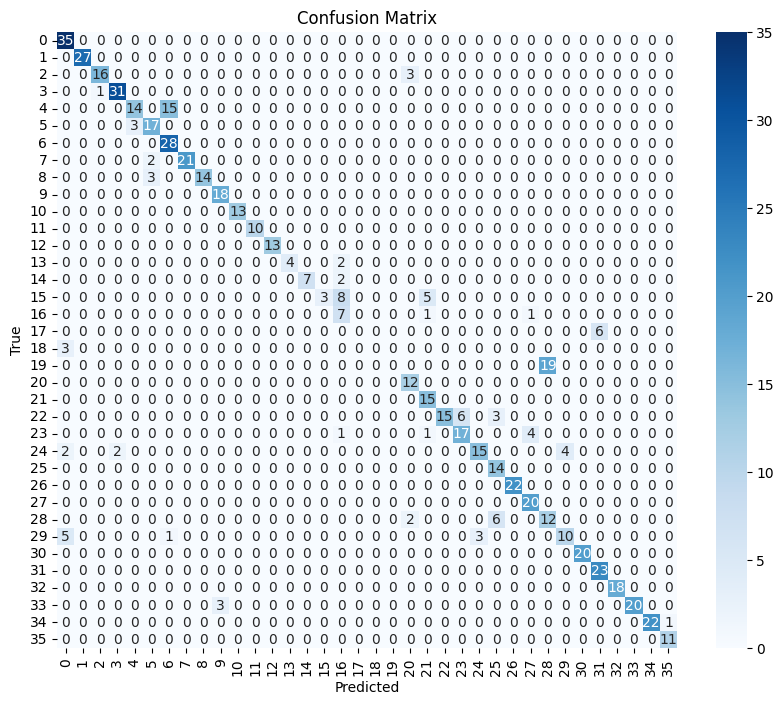

In [ ]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred,axis=1)
y_true_classes = Y_test

# Create confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

F1 Score

In [ ]:
f1 = f1_score(y_true_classes, y_pred_classes,average='weighted')
print(f"F1 Score: {f1:.2f}")

F1 Score: 0.80


Model 2

6 layer Tuned

In [ ]:
model2 = Sequential()

model2.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model2.add(BatchNormalization())
model2.add(Dropout(0.2))

model2.add(Dense(16, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.2))

model2.add(Dense(128, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.2))

model2.add(Dense(32, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.2))

model2.add(Dense(128, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.2))

model2.add(Dense(128, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.2))

model2.add(Dense(36, activation='softmax'))

model2.compile(optimizer="Adam", loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
checkpoint = ModelCheckpoint("best_model2.h5", monitor='val_loss', save_best_only=True, mode='min', verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6, verbose=1)

history = model2.fit(X_train, Y_train, epochs=100, batch_size=64, validation_data=(X_valid, Y_valid),callbacks=[checkpoint, early_stopping, reduce_lr])

Epoch 1/100
76/81 [===========================>..] - ETA: 0s - loss: 3.1139 - accuracy: 0.1778
Epoch 1: val_loss improved from inf to 8.07090, saving model to best_model2.h5
81/81 [==============================] - 8s 11ms/step - loss: 3.0760 - accuracy: 0.1836 - val_loss: 8.0709 - val_accuracy: 0.0201 - lr: 0.0010
Epoch 2/100
23/81 [=======>......................] - ETA: 0s - loss: 2.3428 - accuracy: 0.2962

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


73/81 [==========================>...] - ETA: 0s - loss: 2.2251 - accuracy: 0.3183
Epoch 2: val_loss improved from 8.07090 to 6.94268, saving model to best_model2.h5
81/81 [==============================] - 1s 7ms/step - loss: 2.2007 - accuracy: 0.3233 - val_loss: 6.9427 - val_accuracy: 0.0246 - lr: 0.0010
Epoch 3/100
74/81 [==========================>...] - ETA: 0s - loss: 1.9355 - accuracy: 0.3613
Epoch 3: val_loss improved from 6.94268 to 5.08287, saving model to best_model2.h5
81/81 [==============================] - 1s 7ms/step - loss: 1.9357 - accuracy: 0.3598 - val_loss: 5.0829 - val_accuracy: 0.0460 - lr: 0.0010
Epoch 4/100
75/81 [==========================>...] - ETA: 0s - loss: 1.7901 - accuracy: 0.4027
Epoch 4: val_loss improved from 5.08287 to 2.07824, saving model to best_model2.h5
81/81 [==============================] - 1s 7ms/step - loss: 1.7978 - accuracy: 0.4008 - val_loss: 2.0782 - val_accuracy: 0.2578 - lr: 0.0010
Epoch 5/100
71/81 [=========================>....] -

Evaluation

In [ ]:
model2.evaluate(X_test, Y_test)

21/21 [==============================] - 0s 2ms/step - loss: 0.7091 - accuracy: 0.7417


[0.7091461420059204, 0.7416918277740479]

Confusion Matrix

21/21 [==============================] - 0s 3ms/step


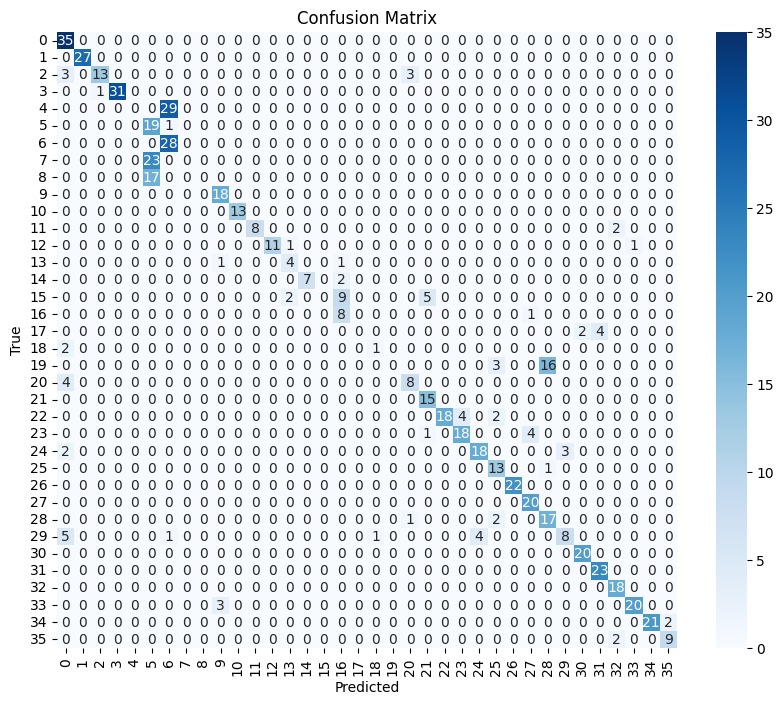

In [ ]:
y_pred = model2.predict(X_test)
y_pred_classes = np.argmax(y_pred,axis=1)
y_true_classes = Y_test

# Create confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

F1 Score

In [ ]:
from sklearn.metrics import f1_score
f1 = f1_score(y_true_classes, y_pred_classes,average='weighted')
print(f"F1 Score: {f1:.2f}")

F1 Score: 0.69


Model 3

3 layer semi tuned

In [ ]:
model3 = Sequential()

model3.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model3.add(BatchNormalization())
model3.add(Dropout(0.2))

model3.add(Dense(16, activation='relu'))
model3.add(BatchNormalization())
model3.add(Dropout(0.2))

model3.add(Dense(32, activation='relu'))
model3.add(BatchNormalization())
model3.add(Dropout(0.2))

model3.add(Dense(36, activation='softmax'))

model3.compile(optimizer="Adam", loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
checkpoint = ModelCheckpoint("best_model3.h5", monitor='val_loss', save_best_only=True, mode='min', verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6, verbose=1)

history = model3.fit(X_train, Y_train, epochs=100, batch_size=64, validation_data=(X_valid, Y_valid),callbacks=[checkpoint, early_stopping, reduce_lr])

Epoch 1/100
79/81 [============================>.] - ETA: 0s - loss: 3.4728 - accuracy: 0.0791
Epoch 1: val_loss improved from inf to 9.57791, saving model to best_model3.h5
81/81 [==============================] - 4s 11ms/step - loss: 3.4658 - accuracy: 0.0804 - val_loss: 9.5779 - val_accuracy: 0.0259 - lr: 0.0010
Epoch 2/100
38/81 [=============>................] - ETA: 0s - loss: 2.8386 - accuracy: 0.1965

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


74/81 [==========================>...] - ETA: 0s - loss: 2.7329 - accuracy: 0.2200
Epoch 2: val_loss improved from 9.57791 to 7.37794, saving model to best_model3.h5
81/81 [==============================] - 0s 4ms/step - loss: 2.7064 - accuracy: 0.2269 - val_loss: 7.3779 - val_accuracy: 0.0259 - lr: 0.0010
Epoch 3/100
79/81 [============================>.] - ETA: 0s - loss: 2.2737 - accuracy: 0.3210
Epoch 3: val_loss improved from 7.37794 to 4.93405, saving model to best_model3.h5
81/81 [==============================] - 0s 4ms/step - loss: 2.2721 - accuracy: 0.3219 - val_loss: 4.9341 - val_accuracy: 0.0829 - lr: 0.0010
Epoch 4/100
74/81 [==========================>...] - ETA: 0s - loss: 1.9962 - accuracy: 0.3989
Epoch 4: val_loss improved from 4.93405 to 3.14719, saving model to best_model3.h5
81/81 [==============================] - 0s 4ms/step - loss: 1.9882 - accuracy: 0.4006 - val_loss: 3.1472 - val_accuracy: 0.1677 - lr: 0.0010
Epoch 5/100
77/81 [===========================>..] -

Evaluation

In [ ]:
model3.evaluate(X_test, Y_test)

21/21 [==============================] - 0s 4ms/step - loss: 0.4855 - accuracy: 0.8520


[0.485531210899353, 0.8519637584686279]

Confusion Matrix

21/21 [==============================] - 0s 3ms/step


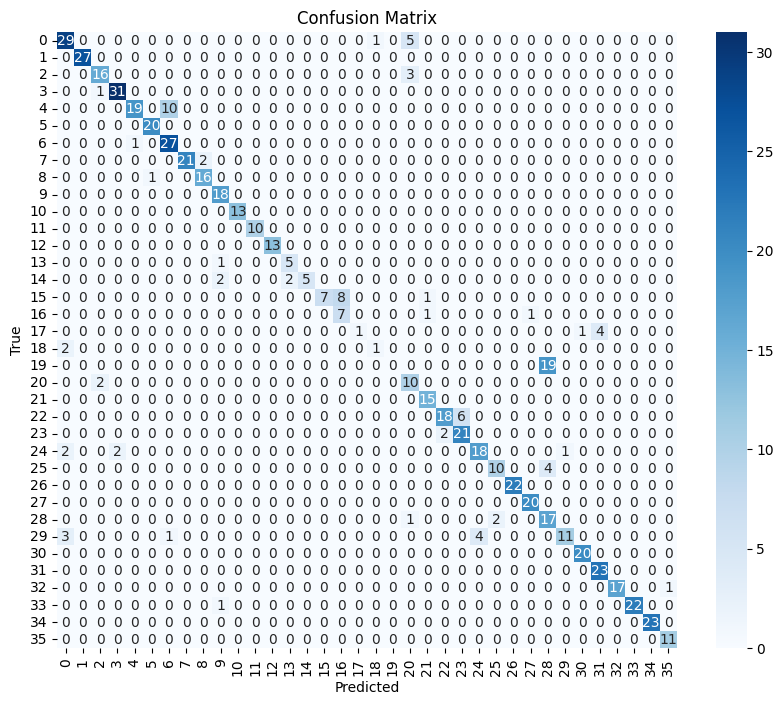

In [ ]:
y_pred = model3.predict(X_test)
y_pred_classes = np.argmax(y_pred,axis=1)
y_true_classes = Y_test

# Create confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

F1 Score

In [ ]:
from sklearn.metrics import f1_score
f1 = f1_score(y_true_classes, y_pred_classes,average='weighted')
print(f"F1 Score: {f1:.2f}")

F1 Score: 0.84


Model 4

3 layer Tuned

In [ ]:
model4 = Sequential()

model4.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model4.add(BatchNormalization())
model4.add(Dropout(0.2))

model4.add(Dense(64, activation='relu'))
model4.add(BatchNormalization())
model4.add(Dropout(0.2))

model4.add(Dense(64, activation='relu'))
model4.add(BatchNormalization())
model4.add(Dropout(0.2))

model4.add(Dense(36, activation='softmax'))

model4.compile(optimizer="Adam", loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
checkpoint = ModelCheckpoint("best_model4.h5", monitor='val_loss', save_best_only=True, mode='min', verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6, verbose=1)

history = model4.fit(X_train, Y_train, epochs=100, batch_size=64, validation_data=(X_valid, Y_valid),callbacks=[checkpoint, early_stopping, reduce_lr])

Epoch 1/100
75/81 [==========================>...] - ETA: 0s - loss: 2.9196 - accuracy: 0.2085
Epoch 1: val_loss improved from inf to 13.06117, saving model to best_model4.h5
81/81 [==============================] - 6s 20ms/step - loss: 2.8607 - accuracy: 0.2215 - val_loss: 13.0612 - val_accuracy: 0.0272 - lr: 0.0010
Epoch 2/100
10/81 [==>...........................] - ETA: 0s - loss: 1.9950 - accuracy: 0.4172

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


81/81 [==============================] - ETA: 0s - loss: 1.7295 - accuracy: 0.4760
Epoch 2: val_loss improved from 13.06117 to 10.54140, saving model to best_model4.h5
81/81 [==============================] - 1s 15ms/step - loss: 1.7295 - accuracy: 0.4760 - val_loss: 10.5414 - val_accuracy: 0.0473 - lr: 0.0010
Epoch 3/100
77/81 [===========================>..] - ETA: 0s - loss: 1.3914 - accuracy: 0.5355
Epoch 3: val_loss improved from 10.54140 to 5.46425, saving model to best_model4.h5
81/81 [==============================] - 1s 9ms/step - loss: 1.3845 - accuracy: 0.5384 - val_loss: 5.4643 - val_accuracy: 0.0900 - lr: 0.0010
Epoch 4/100
81/81 [==============================] - ETA: 0s - loss: 1.1731 - accuracy: 0.6040
Epoch 4: val_loss improved from 5.46425 to 2.01467, saving model to best_model4.h5
81/81 [==============================] - 1s 12ms/step - loss: 1.1731 - accuracy: 0.6040 - val_loss: 2.0147 - val_accuracy: 0.3776 - lr: 0.0010
Epoch 5/100
71/81 [=========================>.

Evaluation

In [ ]:
model4.evaluate(X_test, Y_test)

21/21 [==============================] - 0s 3ms/step - loss: 0.3277 - accuracy: 0.8852


[0.32765763998031616, 0.8851963877677917]

Confusion Matrix

21/21 [==============================] - 0s 2ms/step


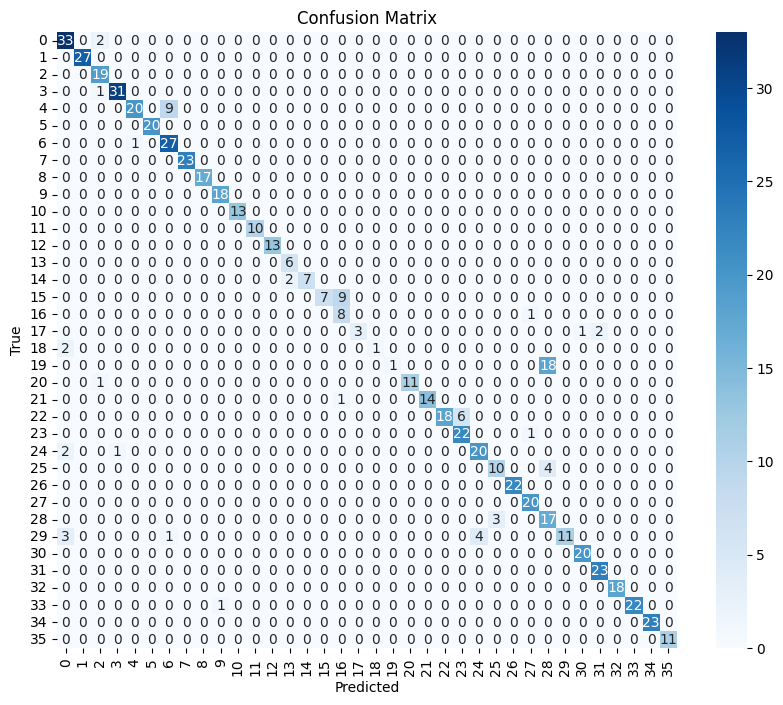

In [ ]:
y_pred = model4.predict(X_test)
y_pred_classes = np.argmax(y_pred,axis=1)
y_true_classes = Y_test

# Create confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

F1 Score

In [ ]:
from sklearn.metrics import f1_score
f1 = f1_score(y_true_classes, y_pred_classes,average='weighted')
print(f"F1 Score: {f1:.2f}")

F1 Score: 0.88


Model 5

2 layer Tuned

In [ ]:
model5 = Sequential()

model5.add(Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model5.add(BatchNormalization())
model5.add(Dropout(0.2))

model5.add(Dense(256, activation='relu'))
model5.add(BatchNormalization())
model5.add(Dropout(0.2))

model5.add(Dense(36, activation='softmax'))

model5.compile(optimizer="Adam", loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
checkpoint = ModelCheckpoint("best_model5.h5", monitor='val_loss', save_best_only=True, mode='min', verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6, verbose=1)

history = model5.fit(X_train, Y_train, epochs=100, batch_size=64, validation_data=(X_valid, Y_valid),callbacks=[checkpoint, early_stopping, reduce_lr])

Epoch 1/100
78/81 [===========================>..] - ETA: 0s - loss: 1.6246 - accuracy: 0.4970
Epoch 1: val_loss improved from inf to 31.63070, saving model to best_model5.h5
81/81 [==============================] - 4s 15ms/step - loss: 1.6045 - accuracy: 0.5018 - val_loss: 31.6307 - val_accuracy: 0.0201 - lr: 0.0010
Epoch 2/100
14/81 [====>.........................] - ETA: 0s - loss: 0.9581 - accuracy: 0.6562

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


79/81 [============================>.] - ETA: 0s - loss: 0.8969 - accuracy: 0.6831
Epoch 2: val_loss improved from 31.63070 to 20.21235, saving model to best_model5.h5
81/81 [==============================] - 1s 10ms/step - loss: 0.8968 - accuracy: 0.6839 - val_loss: 20.2123 - val_accuracy: 0.0285 - lr: 0.0010
Epoch 3/100
76/81 [===========================>..] - ETA: 0s - loss: 0.7707 - accuracy: 0.7214
Epoch 3: val_loss improved from 20.21235 to 9.93487, saving model to best_model5.h5
81/81 [==============================] - 0s 6ms/step - loss: 0.7739 - accuracy: 0.7210 - val_loss: 9.9349 - val_accuracy: 0.0583 - lr: 0.0010
Epoch 4/100
72/81 [=========================>....] - ETA: 0s - loss: 0.6956 - accuracy: 0.7474
Epoch 4: val_loss improved from 9.93487 to 3.29234, saving model to best_model5.h5
81/81 [==============================] - 0s 6ms/step - loss: 0.6959 - accuracy: 0.7490 - val_loss: 3.2923 - val_accuracy: 0.1794 - lr: 0.0010
Epoch 5/100
81/81 [============================

In [ ]:
model5.evaluate(X_test, Y_test)

21/21 [==============================] - 0s 3ms/step - loss: 0.2770 - accuracy: 0.8927


[0.27698469161987305, 0.8927492499351501]

21/21 [==============================] - 0s 2ms/step


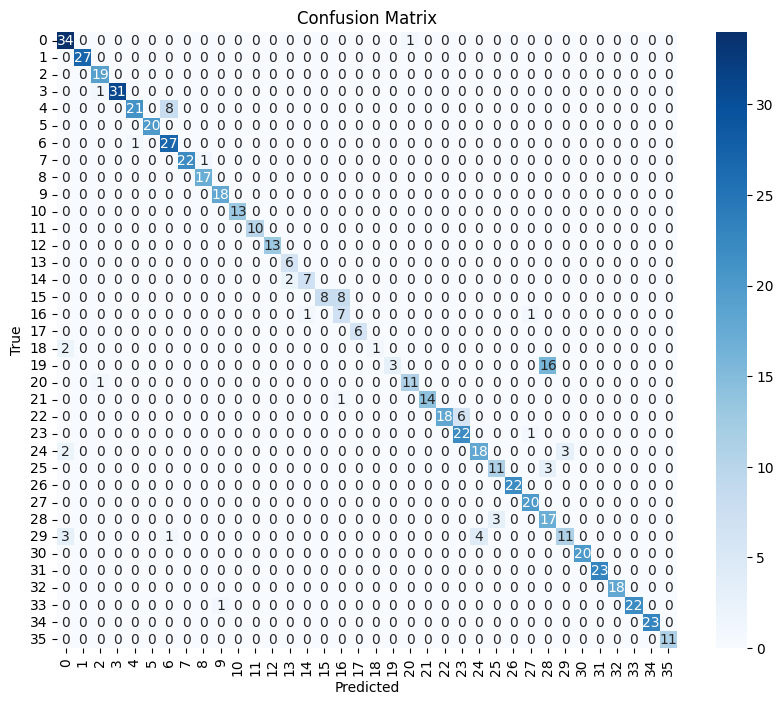

In [ ]:
y_pred = model5.predict(X_test)
y_pred_classes = np.argmax(y_pred,axis=1)
y_true_classes = Y_test

# Create confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
from sklearn.metrics import f1_score
f1 = f1_score(y_true_classes, y_pred_classes,average='weighted')
print(f"F1 Score: {f1:.2f}")

F1 Score: 0.89


Libraries for RBF

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, silhouette_score

Dataset

In [3]:
dataset = pd.read_csv("/content/Dataset2.csv")
dataset.head()

,RSSI 1,RSSI 2,RSSI 3,Label
0,-78.7684,-76.7218,-74.1049,0
1,-75.0635,-73.0391,-74.0549,0
2,-73.7510,-73.6725,-74.0372,0
3,-77.7196,-73.9967,-74.0281,0
4,-78.7567,-74.5866,-74.6118,0


In [4]:
X = dataset.iloc[:,:-1].values
Y = dataset.iloc[:,-1].values

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    Y,
    test_size=0.2,
    shuffle=True,
    random_state=42)

RBF_SVM SVM with rbf kernel

In [6]:
svm_classifier = SVC(kernel='rbf')

In [7]:
svm_classifier.fit(X_train, y_train)

SVC()

In [8]:
y_pred = svm_classifier.predict(X_test)

Evaluation

In [9]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.910944935418083


Confusion matrix

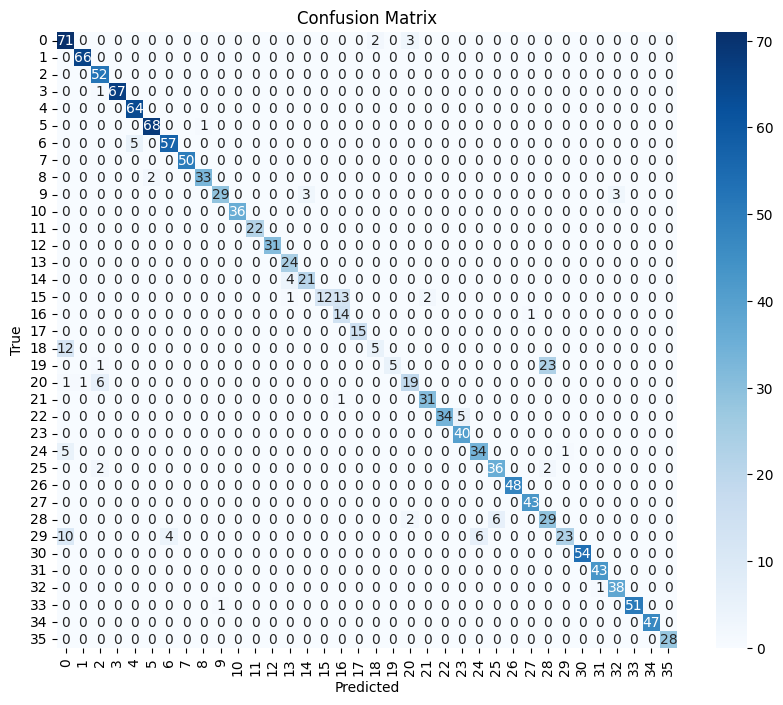

In [10]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

F1 Score evaluation

In [11]:
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1 Score: {f1:.2f}")

F1 Score: 0.90


Kmeans

In [12]:
kmeans = KMeans(n_clusters=35, random_state=42)
kmeans.fit(X_train)

train_cluster_labels = kmeans.labels_
test_cluster_labels = kmeans.predict(X_test)

accuracy = accuracy_score(y_test, test_cluster_labels)
print(f"Accuracy: {accuracy}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Accuracy: 0.005438477226376614


KNN K nearest neighbor

In [13]:
knn_classifier = KNeighborsClassifier(n_neighbors=35)
knn_classifier.fit(X_train, y_train)

y_pred = knn_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 93.61%


Confusion Matrix

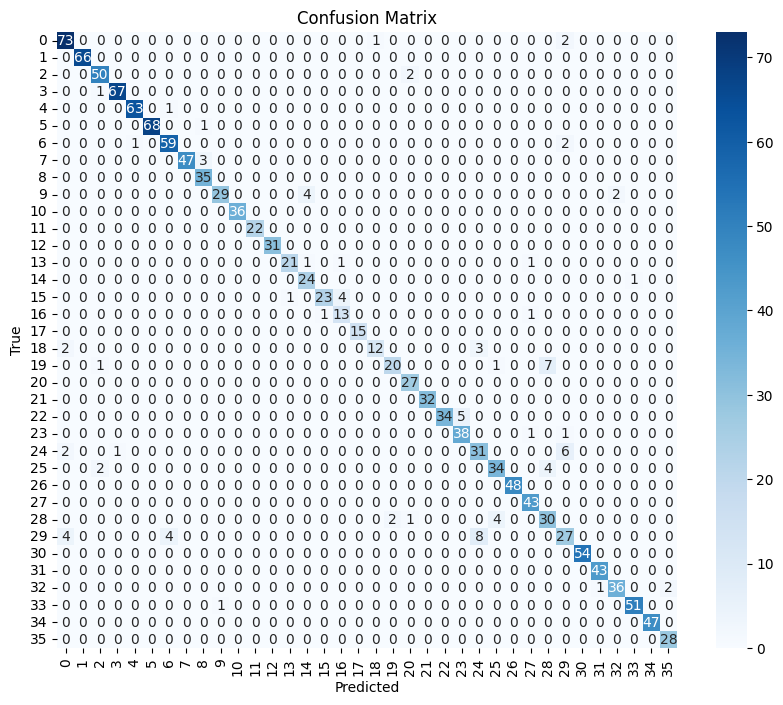

In [15]:
y_pred = knn_classifier.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [16]:
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1 Score: {f1:.2f}")

F1 Score: 0.94


Adaboost Decision tree

In [17]:
base_classifier = DecisionTreeClassifier(max_depth=1)

adaboost_classifier = AdaBoostClassifier(base_classifier, n_estimators=50, random_state=42)

adaboost_classifier.fit(X_train, y_train)

y_pred = adaboost_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.09517335146159075


Confusion Matrix

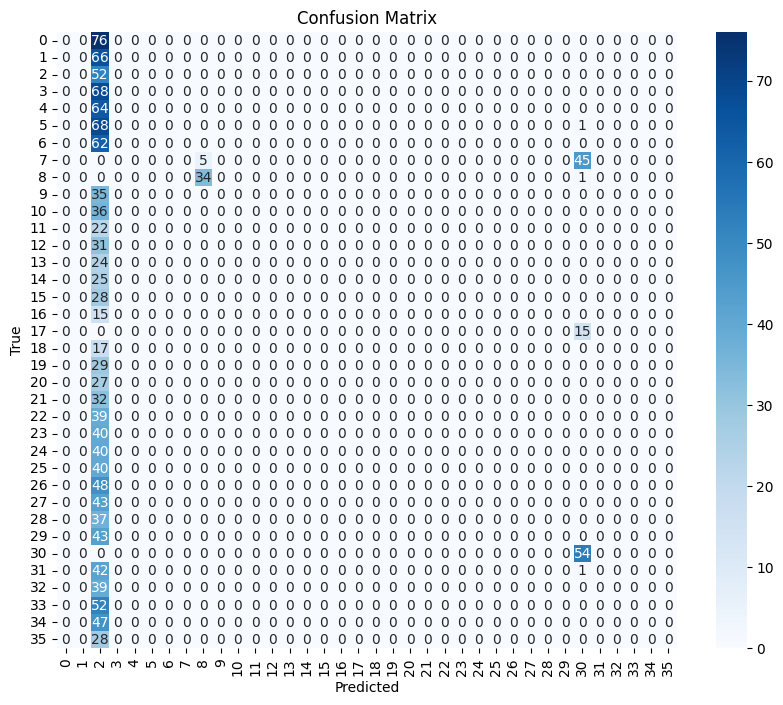

In [18]:
y_pred = adaboost_classifier.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [19]:
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1 Score: {f1:.2f}")

F1 Score: 0.05
